In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

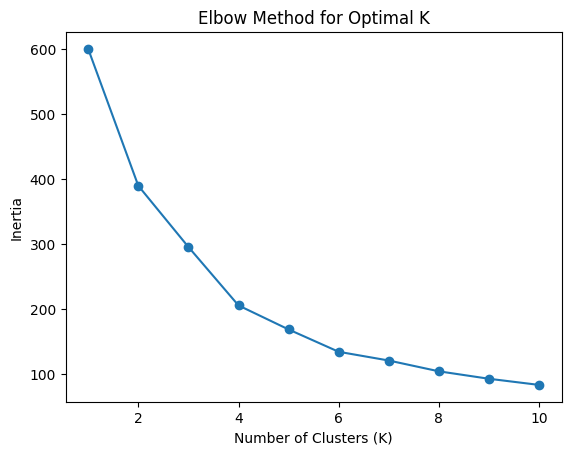

In [ ]:
distortions = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    distortions.append(kmeans.inertia_)

plt.plot(K_range, distortions, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


Training Set - Silhouette Score: 0.40464116808159645, Inertia: 172.37741402201146


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


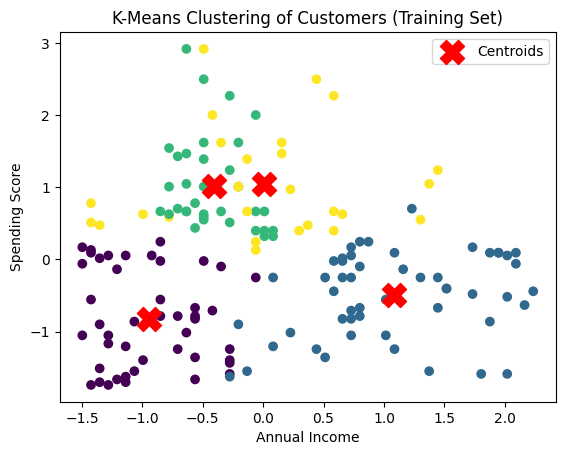


Testing Set - Silhouette Score: 0.385991380167046, Inertia: 172.37741402201146


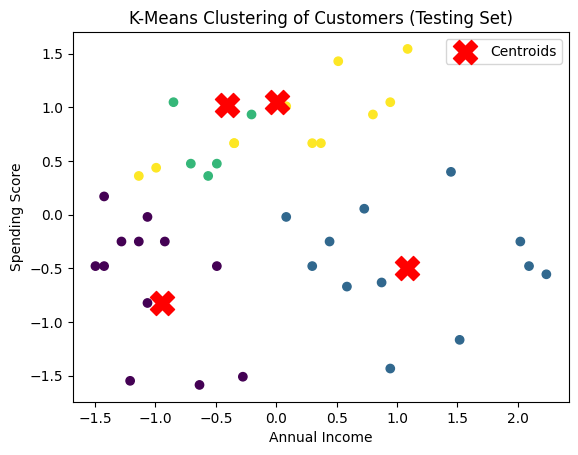


Training Set:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
79           80  Female   49                  54                      42   
197         198    Male   32                 126                      74   
38           39  Female   36                  37                      26   
24           25  Female   54                  28                      14   
122         123  Female   40                  69                      58   
..          ...     ...  ...                 ...                     ...   
106         107  Female   66                  63                      50   
14           15    Male   37                  20                      13   
92           93    Male   48                  60                      49   
179         180    Male   35                  93                      90   
102         103    Male   67                  62                      59   

     Cluster  
79         1  
197        2  
38         1  
24         1

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

dataset_path = '/content/drive/MyDrive/Mall_Customers.csv'

df = pd.read_csv(dataset_path)

features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

k = 4

# Split the data into training and testing sets
features_train, features_test = train_test_split(features_scaled, test_size=0.2, random_state=42)

# Apply k-means clustering on the training set
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_train = kmeans.fit_predict(features_train)

# Evaluate the clustering performance on the training set
silhouette_train = silhouette_score(features_train, clusters_train)
inertia_train = kmeans.inertia_

print(f"Training Set - Silhouette Score: {silhouette_train}, Inertia: {inertia_train}")

# Visualize the clusters on the training set
plt.scatter(features_train[:, 0], features_train[:, 1], c=clusters_train, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering of Customers (Training Set)')
plt.legend()
plt.show()

# Apply the trained k-means model to the testing set
clusters_test = kmeans.predict(features_test)

# Evaluate the clustering performance on the testing set
silhouette_test = silhouette_score(features_test, clusters_test)
inertia_test = kmeans.inertia_

print(f"\nTesting Set - Silhouette Score: {silhouette_test}, Inertia: {inertia_test}")

# Visualize the clusters on the testing set
plt.scatter(features_test[:, 0], features_test[:, 1], c=clusters_test, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering of Customers (Testing Set)')
plt.legend()
plt.show()

# Add the cluster labels to the original DataFrame
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train['Cluster'] = clusters_train
df_test['Cluster'] = kmeans.predict(features_test)

# Display the clustered data for training and testing sets
print("\nTraining Set:")
print(df_train[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']])

print("\nTesting Set:")
print(df_test[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']])
